<a href="https://colab.research.google.com/github/ayanrafique/FastAiFun/blob/master/Pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [10]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install kaggle

In [5]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayanrafique","key":"0a740b235dd08908a16dcc88852f612a"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [0]:
# set the batch size i.e. the number of images to train at a time
# reduce this number if you get an out of memory error 
bs = 64

In [12]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 47.8MB/s]
100% 2.29G/2.29G [00:29<00:00, 84.5MB/s]


In [13]:
from zipfile import ZipFile
file_name = "/content/chest-xray-pneumonia.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
path = "/content/chest_xray/chest_xray"


In [0]:
# create a data bunch
np.random.seed(2)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, num_workers=0, 
                                  bs=bs, valid_pct=0.2).normalize(imagenet_stats)

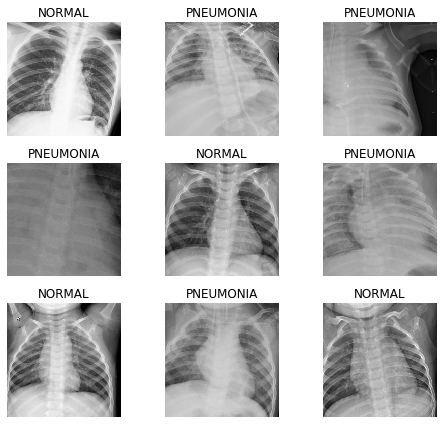

In [18]:
# display 3 rows of data
data.show_batch(rows=3, figsize=(7,6))

In [0]:
# verify the classes
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [0]:
# create a neural network
learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="/tmp/model/")

In [0]:
learn.model

In [0]:
# fit 4 layers
learn.fit_one_cycle(4)

In [0]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
# plot the top losses
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
# plot the confusion matrix
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

The number of samples that were pneumonia but predicted as normal is a lot (55) and hence we will train the model more!

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
# we select the slice with the steepest slope
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-3,1e-2))

In [0]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

In [0]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

We have managed to significantly reduce the error rate and predict the Pneumonia cases correctly which is the class we care about!